<a href="https://colab.research.google.com/github/mahmud-nobe/cs110_assignment_1/blob/master/cs110_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Md Mahmudunnobe"
COLLABORATORS = ""

---


# CS110 Spring 2020- Assignment 1
# Divide and Conquer Sorting Algorithms

This assignment focuses on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 

Every CS110 assignment begins with a check-up on your class responsibilities and professional standing. If you have submitted make-up work, you will also receive formative feedback on it, accompanied by a grade reflecting on your ability to address one of the course LOs. Thus to complete the first part of this assignment, you will need to take a screenshot of your CS110 dashboard on Forum where the following is visible:

* your name.
* your absences for the course have been set to excused up to the last session from week 2 (inclusively) .

This will be evidence that you have submitted acceptable pre-class and make-up work for a CS110 session you may have missed. Please check the specific CS110 make-up and pre-class policies in the syllabus of the course.


**NOTES:**

1. Your assignment submission needs to include the following resources:

* A PDF file must be the first resource. This file must be generated from the template notebook where you have written all of the answers (check this [link](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit#heading=h.10jakf1cwxpq) for instructions on how to do this). Make sure that the PDF displays properly (all text and code can be seen within the paper margins), and that your work is neat and clearly presented. 
* Your second resource must be the template notebook you have downloaded from the gist provided and where you included your answers. The name of this resource must include your own name. Submit this file directly following the directions in this picture:


<img src="https://github.com/mahmud-nobe/cs110_assignment_1/blob/master/upload.png?raw=1" width="800" height="200">

If you are unable to submit the jupyter notebook directly, please compress all the materials of your submission, and submit the zip file as your second resource instead.

2. Tasks (1)-(7) will be graded on the indicated LOs; please make sure to consult their descriptions and rubrics in the course syllabus. You will not be penalized for not attempting the optional challenge.

3. In this first assignment, you will receive formative feedback on your reference, application and justification of the HCs but no actual grades. Only in subsequent assignments will the HCs applications be graded. This is an opportunity for you to deepen your argumentation skills without generating a grade. 

As such, after completing the assignment, evaluate the application of the HCs you have identified prior to and while you were working on this assignment and footnote them (refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work). 

Here are some examples of weak applications of some of the relevant HCs:

* Example 1: “#algorithms: I wrote an implementation of Bubble sort”. 
    * This is an extremely superficial use of the HC in a course on Algorithms, and your reference will be graded accordingly. Instead, consider what constitutes an algorithm (see Cormen et al., sections 1.1 and 1.2). Once you have a good definition of an algorithm, think of how this notion helped you approach the implementation of the algorithm, analyze its complexity and understand why it’s important to write an optimal Python implementation of the algorithm.

* Example 2: “#dataviz: I plotted nice curves showing the execution time of bubble sort, or I plotted beautiful curves with different colors and labels.”

    * Again, these two examples are very superficial uses of the HC #dataviz. Instead, consider writing down how do the plots and figures helped you interpret, analyze and write concluding remarks from your experiments. Or write about any insight you included in your work that came from being able to visualize the curves.


* Example 3: “#professionalism: I wrote a nice paper/article that follows all the directions in this assignment.” 

    * By now, you should realize that this is a poor application of the HC #professionalism. Instead, comment on how you actively considered the HC while deciding on the format, length, and style for writing your report.

4. Your code will be tested for similarity using Turnitin, both to other students’ work and examples available online. As such, be sure to cite all references that you used in devising your solution. Any plagiarism attempts will be referred to the ASC, as per the course’s policy in the syllabus.


** Complete the following tasks which will be graded in the designated LOs and foregrounded HCs (please consult the LOs rubrics on the syllabus):**



## Question 1. [HCs #responsibility; appropriate LO]

Submit a screenshot of your CS110 dashboard with the information described above. You can do this by writing:
```
from IPython.display import Image
Image(filename=’your_screenshot.png’)
```

My Screenshot:

<img src="https://github.com/mahmud-nobe/cs110_assignment_1/blob/master/course%20stat.PNG?raw=1">

## Question 2. [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Write a Python 3 implementation of the three-way merge sort algorithm discussed in class using the code skeleton below. You should also provide at least three test cases (possibly edge cases) that demonstrate the correctness of your code. Your output must be a sorted **Python list.**


In [0]:
import numpy as np

def merge_three(A, p, q, r, s):
  # create three array and copied the elements from Array A
 
  L = A[p:q+1] 
  M = A[q+1:r+1]
  R = A[r+1:s+1]

  # add sentinels in each of the arrays
  L = np.append(L, float('INF'))
  M = np.append(M, float('INF'))
  R = np.append(R, float('INF'))

  # set i,j,k as the first index. Compare the i'th element of L, j'th element of M and 
  # k'th element of R array and store the smaller
  # one to the array A. Increase the i/j/k accordingly.
  # Do this from l = p to r
  i = 0
  j = 0
  k = 0
  for l in range(p,s+1):
    if(L[i] <= M[j] and L[i] <= R[k]):
      A[l] = L[i]
      i += 1
    elif (M[j] <= R[k]):
      A[l] = M[j]
      j += 1
    else:
      A[l] = R[k]
      k += 1  
  return A

    
def three_way_merge(arr):
    """Implements three-way marge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    
    # make the array an numpy array and set the first and last index as p and s
    arr = np.array(arr)
    s = len(arr) - 1
    p = 0

    # when p < s, means the number of element is larger than 1, divide the array into three subarray
    # according to their index number. Then, recursively call three_way_merge in all arrays and save the sorted 
    # subarray in their respective indices.
    # Lastly merge the arrays by calling merge_three function
    # Base case is when p = s, means n=1, then returns the array itself.
    if p < s:
        q = int((p+s)/3)
        r = int(2*(p+s)/3)
        arr[:q+1] = three_way_merge(arr[:q+1])
        arr[q+1:r+1] = three_way_merge(arr[q+1:r+1])
        arr[r+1:] = three_way_merge(arr[r+1:])
        merge_three(arr,p,q,r,s)
    # return a python list irrespective of the input type
    return(list(arr))
    
    #raise NotImplementedError()

In [208]:
A = [2,7,6,8,1,4,9,6]
three_way_merge(A)

[1, 2, 4, 6, 6, 7, 8, 9]

In [237]:
A = list(reversed(range(-50,50)))
print(A)
print(three_way_merge(A))

[49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50]
[-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [239]:
A = list(range(-50,50))
print(A)
print(three_way_merge(A))

[-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [240]:
import numpy as np
three_way_merge(np.array([4,3,2,1]))

[1, 2, 3, 4]

In [0]:
assert(three_way_merge([4,3,2,1]) == [1,2,3,4])
assert(three_way_merge(np.array([4,3,2,1])) == [1,2,3,4]) 

In [242]:
import random
A = random.choices(range(-100,100),k=10)
B = random.sample(range(-100,100),k=10)
print(A)
print(three_way_merge(np.array(A)))
print(B)
print(three_way_merge(np.array(B)))

[45, 19, -70, 38, -75, 26, -39, 58, -41, 53]
[-75, -70, -41, -39, 19, 26, 38, 45, 53, 58]
[-9, 77, 31, -40, 59, 17, 58, -22, 20, 75]
[-40, -22, -9, 17, 20, 31, 58, 59, 75, 77]


## Question 3.  [#SortingAlgorithms, #PythonProgramming, #CodeReadability, #ComputationalCritique] 

Implement a second version of a three-way merge sort that calls bubble sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify on the basis of theoretical and potentially also experimental arguments what might be an appropriate threshold for the input array for applying bubble sort.


In [0]:
def merge_three(A, p, q, r, s):
  # create three array and copied the elements from Array A
 
  L = A[p:q+1] 
  M = A[q+1:r+1]
  R = A[r+1:s+1]

  # add sentinels in each of the arrays
  L = np.append(L, float('INF'))
  M = np.append(M, float('INF'))
  R = np.append(R, float('INF'))

  # set i,j,k as the first index. Compare the i'th element of L, j'th element of M and 
  # k'th element of R array and store the smaller
  # one to the array A. Increase the i/j/k accordingly.
  # Do this from l = p to r
  i = 0
  j = 0
  k = 0
  for l in range(p,s+1):
    if(L[i] <= M[j] and L[i] <= R[k]):
      A[l] = L[i]
      i += 1
    elif (M[j] <= R[k]):
      A[l] = M[j]
      j += 1
    else:
      A[l] = R[k]
      k += 1  
  return A

# bubbleSort from pre class work
def bubbleSort(A):
    # put a mark at the beginning of the array
    # go through the whole array and every time check the adjacent elements and sort them by swapping
    # increase the mark and then go again through the remaining array 
    # continue doing this until the mark reached to the end
    for i in range(len(A)): 
      for j in reversed(range(i,len(A))):
        if (A[j] < A[j-1]):
          A[j], A[j-1] = A[j-1], A[j]
    return A

def extended_three_way_merge(arr):
    """Implements the second version of a three-way merge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    
    # convert into a numpy array and set the first and last indices
    arr = np.array(arr)
    s = len(arr) - 1
    p = 0

    # when p < s, means the number of element is larger than 1, divide the array into three subarray
    # according to their index number. Then, recursively call three_way_merge in all arrays and save the sorted 
    # subarray in their respective indices.
    # Lastly merge the arrays by calling merge_three function
    # Base case is when s <= 2, means n <= 3, then returns the array by sorting it with bubble sort
    if s > 2:
        q = int((p+s)/3)
        r = int(2*(p+s)/3)
        arr[:q+1] = extended_three_way_merge(arr[:q+1])
        arr[q+1:r+1] = extended_three_way_merge(arr[q+1:r+1])
        arr[r+1:] = extended_three_way_merge(arr[r+1:])
        merge_three(arr,p,q,r,s)
    return(bubbleSort(list(arr)))

    # raise NotImplementedError()

In [0]:
assert(extended_three_way_merge([4,3,2,1]) == [1,2,3,4])
assert(extended_three_way_merge(np.array([4,3,2,1])) == [1,2,3,4]) 

## Question 4 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Bucket sort (or Bin sort) is an algorithm that takes as inputs an n-element array and the number of buckets, k, to be used during sorting.  Then, the algorithm distributes the elements of the input array into k-different buckets and proceeds to sort the individual buckets. Then, merges the sorted buckets to obtained the sorted array. Here is pseudocode for the BucketSort algorithm:

<img src="https://github.com/mahmud-nobe/cs110_assignment_1/blob/master/bucket.png?raw=1" width="800" height="200">

The BucketSort code above calls the function GetBucketNum  (see the pseudocode below) to distribute all the elements of array A into k-buckets.  Every element in the array is assigned a bucket number based on its value (positive or negative numbers). GetBucketNum returns the bucket number that corresponds to element A[i].   It takes as inputs the element of the array, A[i], the max and min elements in A, the size of the intervals in every bucket (e.g., if you have numbers with values between  0 and 100 numbers and 5 buckets, every bucket has an interval of size 20 = [100-0]/5).  Notice that in pseudocode, the indices of the arrays are from 1 to n. Thus, GetBucketNum consistently returns a number between 1 and n (make sure you account for this in your Python program).


<img src="https://github.com/mahmud-nobe/cs110_assignment_1/blob/master/getbucketnum.png?raw=1" width="800" height="200">

Write a Python 3 implementation of BucketSort that uses the bubble sort algorithm for sorting the individual buckets in line 10 of the algorithm.

In [0]:
import numpy as np
from math import ceil

def bubbleSort(A):
    for i in range(len(A)):
      for j in reversed(range(i,len(A))):
        if (A[j] < A[j-1]):
          A[j], A[j-1] = A[j-1], A[j]
    return A

def get_bucket_num(a, minimum, maximum, size, k):
  if (a == maximum):
    b = k
  elif (a == minimum):
    b = 1
  else:
    b = 1
    while( a >= minimum + (size*b)):
      b += 1
  return b-1


def bucket_sort(arr, k):
    """Implements BucketSort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    k: int, number of buckets
    
    Output: a sorted Python list"""

    arr = np.array(arr)

    minimum = min(arr)
    maximum = max(arr)
    size = ceil((maximum-minimum)/k)

    buckets = []
    for i in range(k):
      buckets.append([])
    
    for i in range(len(arr)):
      b = get_bucket_num (arr[i], minimum, maximum, size, k)
      buckets[b].append(arr[i])

    A = []
    for i in range(k):
      bubbleSort(buckets[i])
      A = A+buckets[i]
    
    return A
    
    
    


    # raise NotImplementedError()

In [0]:
A = np.array([1,2,3])
B = np.array([2,3,4])


In [219]:
bucket_sort([6,5,4,3,8,2,9,1,7], 3)


[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [0]:
assert(bucket_sort([4,3,2,1], 3) == [1,2,3,4])
assert(bucket_sort(np.array([4,3,2,1]), 3) == [1,2,3,4])

## Question 5 [#SortingAlgorithms, #PythonProgramming, #CodeReadability]

Implement a second version of the BucketSort algorithm. This time in line 10 of BucketSort apply the Bucket sort algorithm recursively until the size of the bucket is less than or equal to k, the base case (notice that fewer than k partitions will be inefficient).


**First way - Less efficient:** Base case is when the size of the input array is less than or equal to 1, it just returns the array. No other sort method is needed, but recursive call will continue until the size becomes one or zero, thus increase the complexity time.

In [0]:
def extended_bucket_sort(arr, k):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    k: int, number of buckets
    
    Output: a sorted Python list"""

    arr = np.array(arr)

    if(len(arr) <= 1):
      return list(arr)
    
    else:
      minimum = min(arr)
      maximum = max(arr)
      size = ceil((maximum-minimum)/k)

      buckets = []
      for i in range(k):
        buckets.append([])
      
      for i in range(len(arr)):
        b = get_bucket_num (arr[i], minimum, maximum, size, k)
        buckets[b].append(arr[i])

      
      for i in range(k):
        if(len(buckets[i]) > 1):      
          buckets[i] = extended_bucket_sort(buckets[i], k)
      
      A = []
      for i in range(k):  
        A = A + buckets[i]
    
    return A

    raise NotImplementedError()

In [222]:
extended_bucket_sort([4,3,2,1],3)

[1, 2, 3, 4]

In [0]:
assert(extended_bucket_sort([4,3,2,1], 3) == [1,2,3,4])
assert(extended_bucket_sort(np.array([4,3,2,1]), 3) == [1,2,3,4])

**Second way: more efficient:** Base case is when the size of the array is less than or equal k, it returns a sorted array using bubble sort. Now the complexity is $O(n^2)$ when the number of element is less than or equal k, but when n goes larger and larger, this algorithm becomes more efficient than the previous one as our recursive call is much lower in number now.

In [0]:
def extended_bucket_sort(arr, k):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    k: int, number of buckets
    
    Output: a sorted Python list"""

    arr = np.array(arr)

    if(len(arr) <= k):
      return list(bubbleSort(arr))
    
    else:
      minimum = min(arr)
      maximum = max(arr)
      size = ceil((maximum-minimum)/k)

      buckets = []
      for i in range(k):
        buckets.append([])
      
      for i in range(len(arr)):
        b = get_bucket_num (arr[i], minimum, maximum, size, k)
        buckets[b].append(arr[i])

      
      for i in range(k):     
        buckets[i] = extended_bucket_sort_2(buckets[i], k)
      
      A = []
      for i in range(k):  
        A = A + buckets[i]
    
      return A

    raise NotImplementedError()

In [225]:
extended_bucket_sort([4,3,2,1],3)

[1, 2, 3, 4]

In [0]:
assert(extended_bucket_sort([4,3,2,1], 3) == [1,2,3,4])
assert(extended_bucket_sort(np.array([4,3,2,1]), 3) == [1,2,3,4])

## Question 6 [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), three-way merge sort, and the augmented merge sort from (3) by producing a plot that illustrates how every running time grows with input size. Make sure to:

1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


In [0]:
### Two way merge short (from pre class work)

def merge_two(A, p, q, r):
  # create two array and copied the elements from Array A
  L = A[p:q+1]
  R = A[q+1:r+1]
  L.append(float('INF'))
  R.append(float('INF'))
    
  # set i,j as the first index. Compare the i'th element of L and j'th element of R array and store the smaller
  # one to the array A. Increase the i/j accordingly.
  # Do this from k = p to r
  i = 0
  j = 0
  for k in range(p,r+1):
    if(L[i] <= R[j]):
      A[k] = L[i]
      i += 1
    else:
      A[k] = R[j]
      j += 1  
  return A

def merge_sort_two(A,p,r):
  if p < r:
      q = int((p+r)/2)
      merge_sort_two(A,p,q)
      merge_sort_two(A,q+1,r)
      merge_two(A,p,q,r)
  return(A)


  # raise NotImplementedError()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

time_merge_two = []
time_merge_three = []
time_merge_three_bubble = []

for k in range(1,16):
  list_k = [i for i in range(100*k, 0, -1)]

  start = time.clock()
  three_way_merge(list_k)
  end = time.clock()
  time_merge_three.append(end-start)

  start = time.clock()
  extended_three_way_merge(list_k)
  end = time.clock()
  time_merge_three_bubble.append(end-start)

  start = time.clock()
  merge_sort_two(list_k, 0, len(list_k)-1)
  end = time.clock()
  time_merge_two.append(end-start)

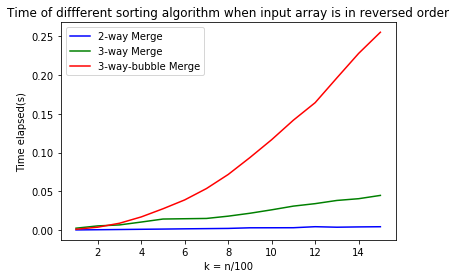

In [229]:
k = range(1,16)
plt.plot(k,time_merge_two,'b')
plt.plot(k,time_merge_three,'g')
plt.plot(k,time_merge_three_bubble,'r')
plt.xlabel('k = n/100')
plt.ylabel('Time elapsed(s)')
plt.legend(['2-way Merge','3-way Merge','3-way-bubble Merge'])
plt.title("Time of diffferent sorting algorithm when input array is in reversed order")
plt.show()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

time_merge_two = []
time_merge_three = []
time_merge_three_bubble = []

import random
for k in range(1,16):
  list_k = random.choices(range(-10000, 10000), k = 100*k)

  start = time.clock()
  three_way_merge(list_k)
  end = time.clock()
  time_merge_three.append(end-start)

  start = time.clock()
  extended_three_way_merge(list_k)
  end = time.clock()
  time_merge_three_bubble.append(end-start)

  start = time.clock()
  merge_sort_two(list_k, 0, len(list_k)-1)
  end = time.clock()
  time_merge_two.append(end-start)

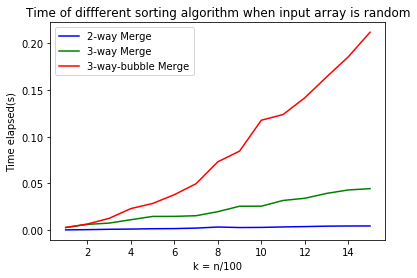

In [234]:
k = range(1,16)
plt.plot(k,time_merge_two,'b')
plt.plot(k,time_merge_three,'g')
plt.plot(k,time_merge_three_bubble,'r')
plt.xlabel('k = n/100')
plt.ylabel('Time elapsed(s)')
plt.legend(['2-way Merge','3-way Merge','3-way-bubble Merge'])
plt.title("Time of diffferent sorting algorithm when input array is random")
plt.show()

## Question 7. [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort, and extended_bucket_sort by producing a plot that illustrates how the algorithms' runtimes depend on both the input size and the nature of the input (e.g., totally randomized inputs vs inversely sorted inputs). Make sure to:

1. define what each algorithm's complexity is in terms of the BigO notation
2. enumerate the explicit assumptions made to assess each algorithm's run time
3. analyze the running times on inputs of at least three different natures
4. and compare your benchmarks with the theoretical result we have discussed in class.


In [0]:
# YOUR CODE HERE
raise NotImplementedError()

## [Optional challenge] Question 8 (#SortingAlgorithm and/or #ComputationalCritique) 

Implement k-way merge sort, where the user specifies k. Develop and run experiments to support a hypothesis about the “best” value of k.


In [0]:
def merge_k(A, p, middle, s):
  # create three array and copied the elements from Array A
 
  k = len(middle) + 1
  buckets = []
  for i in range(k):
    buckets.append([])
  
  bucket[0] = A[p:middle[0]+1]
  for i in range(1,len(middle)):
    buckets[i] = A[middle[i-1]:middle[i]+1]
  
  bucket[k-1] = A[middle[-1]+1:s+1]

  for i in range(k):
    buckets[i] = np.append(buckets[i], float('INF'))

  # set i,j,k as the first index. Compare the i'th element of L, j'th element of M and 
  # k'th element of R array and store the smaller
  # one to the array A. Increase the i/j/k accordingly.
  # Do this from l = p to r


  indices = np.zeros(k)

  for i in range(p,s+1):
    min_num = buckets[0][indices[0]]
    min_bucket = 0
    for j in range(1,k):
      if (buckets[j][indices[j]]) < min_num) :
        min_num = buckets[j][indices[j]]
        min_bucket = j
    A[i] = min_num
    indices[min_bucket] += 1
  
  return A

#########

def k_way_merge(arr, k):
    """Implements k-way marge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    
    arr = np.array(arr)
    s = len(arr) - 1
    p = 0

    if p < s:
        middle = []
        for i in range(k-1):
          middle[i] = 
        q = int((p+s)/3)
        r = int(2*(p+s)/3)
        arr[:q+1] = three_way_merge(arr[:q+1])
        arr[q+1:r+1] = three_way_merge(arr[q+1:r+1])
        arr[r+1:] = three_way_merge(arr[r+1:])
        merge_three(arr,p,q,r,s)
    return(list(arr))

raise NotImplementedError()